<img src="https://github.com/djp840/MSDS_422_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS422 Assignment 01:

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

### European Centre for Disease Prevention and Control 
<div class="alert alert-block alert-info">
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide</div>

### Data Dictionary COVID-19 

The MSDS422_COVID19 data frame has 32771 rows and 10 columns.<br>
<br>
This data frame contains the following columns:

<b>Date</b><br>
Formatted  datetime64[ns]<br>
<br>
<b>Day</b><br>
Calendar day, dtype int64<br>
<br>
<b>Month</b><br>
Calendar month, dtype int64<br>
<br>
<b>Year</b><br>
Calendar year, dtype int64<br>
<br>
<b>Cases</b><br>
Number of Cases Per Day, dtype int64<br>
<br>
<b>Deaths</b><br>
Number of Deaths, dtype int64<br>
<br>
<b>Country </b><br>
Country Name, dtype object<br>
<br>
<b>Population</b><br>
Country Population<br>
<br>
<b>Continent</b><br>
Continent continuous expanses of land (Africa, Antarctica, Asia, Australia, Europe, North America, South America)<br>
<br>
<b>CumulativeNumberPer100KCases </b><br>
Cumulative Number For 14 Days of COVID-19 Cases per 100000<br>
<br>
<b>Sources:</b><br>

## Import packages 



In [1]:
import pandas as pd  
import numpy as np  
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import math
from datetime import datetime

In [2]:
#pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline

### Load Data (Local Directory)

In [3]:
covid19_dfA=pd.read_csv('./data/MSDS422_covid19_20200825v3.csv')

### Data Quality Review 

In [4]:
print("Shape:", covid19_dfA.shape,"\n")
print("Variable Types:") 
print(covid19_dfA.dtypes)

covid19_dfA.head(15)

Shape: (38492, 10) 

Variable Types:
Date                              object
Day                                int64
Month                              int64
Year                               int64
Cases                              int64
Deaths                             int64
Country                           object
Population                         int64
Continent                         object
CumulativeNumberPer100KCases     float64
dtype: object


,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases
0,25/08/2020,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749
1,24/08/2020,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112
2,23/08/2020,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112
3,22/08/2020,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619
4,21/08/2020,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766
5,20/08/2020,20,8,2020,160,8,Afghanistan,38041757,Asia,2.268560
6,19/08/2020,19,8,2020,0,0,Afghanistan,38041757,Asia,2.024092
7,18/08/2020,18,8,2020,3,0,Afghanistan,38041757,Asia,2.239644
8,17/08/2020,17,8,2020,45,5,Afghanistan,38041757,Asia,2.329020
9,16/08/2020,16,8,2020,120,7,Afghanistan,38041757,Asia,2.210729


## Exploritory Data Analysis (EDA) 

### Number of Coutries 

In [5]:
len(covid19_dfA.Country.unique())

210

### Summary Statistics 

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row will indicate if column has missing records
</div> 

In [6]:
covid19_dfA.describe()

,Day,Month,Year,Cases,Deaths,Population,CumulativeNumberPer100KCases
count,38492.000000,38492.000000,38492.000000,38492.000000,38492.000000,3.849200e+04,38492.000000
mean,15.810558,5.192585,2019.998259,615.382937,21.247376,4.384876e+07,27.128374
std,8.694756,1.995496,0.041685,3815.217442,125.237191,1.598573e+08,67.447288
min,1.000000,1.000000,2019.000000,0.000000,0.000000,8.150000e+02,-1.262589
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.394969e+06,0.060058
50%,16.000000,5.000000,2020.000000,7.000000,0.000000,8.519373e+06,2.882863
75%,23.000000,7.000000,2020.000000,126.000000,2.000000,3.036604e+07,19.221559
max,31.000000,12.000000,2020.000000,78427.000000,4928.000000,1.433784e+09,1058.225943


### Review Dataset for Missing Values

<div class="alert alert-block alert-warning">
Review dataset for missing records
</div>

In [7]:
covid19_dfA.isnull().sum()

Date                             0
Day                              0
Month                            0
Year                             0
Cases                            0
Deaths                           0
Country                          0
Population                       0
Continent                        0
CumulativeNumberPer100KCases     0
dtype: int64

## Preprocess Data for Analysis

#### Date Column formatted into ISO 8601 standard format (Year - Month - Day)

In [8]:
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['Date'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['Date'], format='%Y/%m/%d')
covid19_dfA['Date'].head()

0   2020-08-25
1   2020-08-24
2   2020-08-23
3   2020-08-22
4   2020-08-21
Name: Date, dtype: datetime64[ns]

#### Review Data Types (dtypes)

In [9]:
covid19_dfA.dtypes

Date                             datetime64[ns]
Day                                       int64
Month                                     int64
Year                                      int64
Cases                                     int64
Deaths                                    int64
Country                                  object
Population                                int64
Continent                                object
CumulativeNumberPer100KCases            float64
dtype: object

In [10]:
covid19_dfA.isnull().sum()

Date                             0
Day                              0
Month                            0
Year                             0
Cases                            0
Deaths                           0
Country                          0
Population                       0
Continent                        0
CumulativeNumberPer100KCases     0
dtype: int64

In [11]:
covid19_dfA.head()

,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases
0,2020-08-25,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749
1,2020-08-24,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112
2,2020-08-23,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112
3,2020-08-22,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619
4,2020-08-21,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766


In [12]:
covid19_dfA.shape

(38492, 10)

In [13]:
covid19_dfA.dtypes

Date                             datetime64[ns]
Day                                       int64
Month                                     int64
Year                                      int64
Cases                                     int64
Deaths                                    int64
Country                                  object
Population                                int64
Continent                                object
CumulativeNumberPer100KCases            float64
dtype: object

### Write out file</br>
> - covid19_dfA.to_excel()</br>
> - covid19_dfA.to_csv()</br>

## Visualizing Data

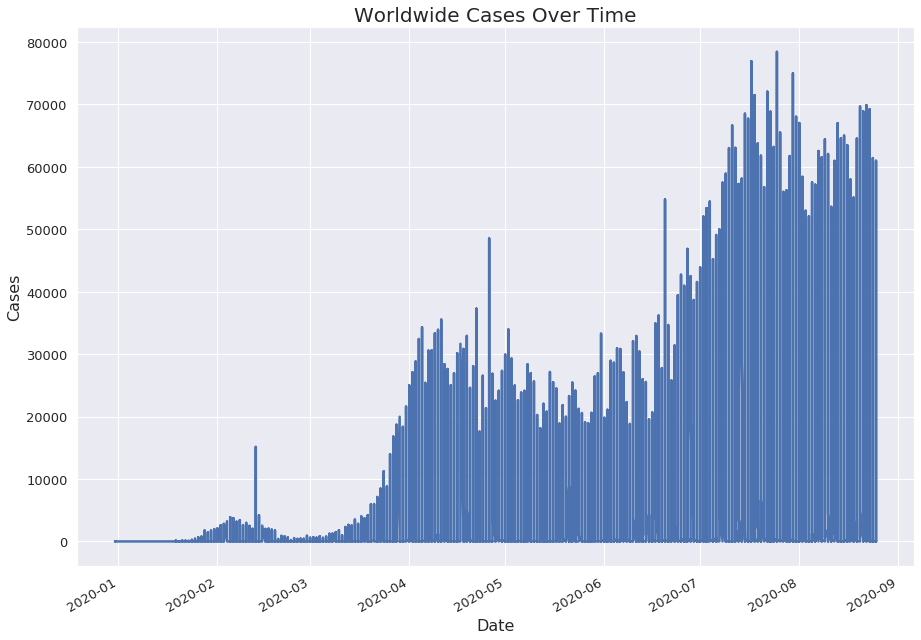

In [14]:
world_daily = covid19_dfA.set_index('Date')
sns.set_color_codes("colorblind")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['Cases'].plot(linewidth = 2.5)


plt.title('Worldwide Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

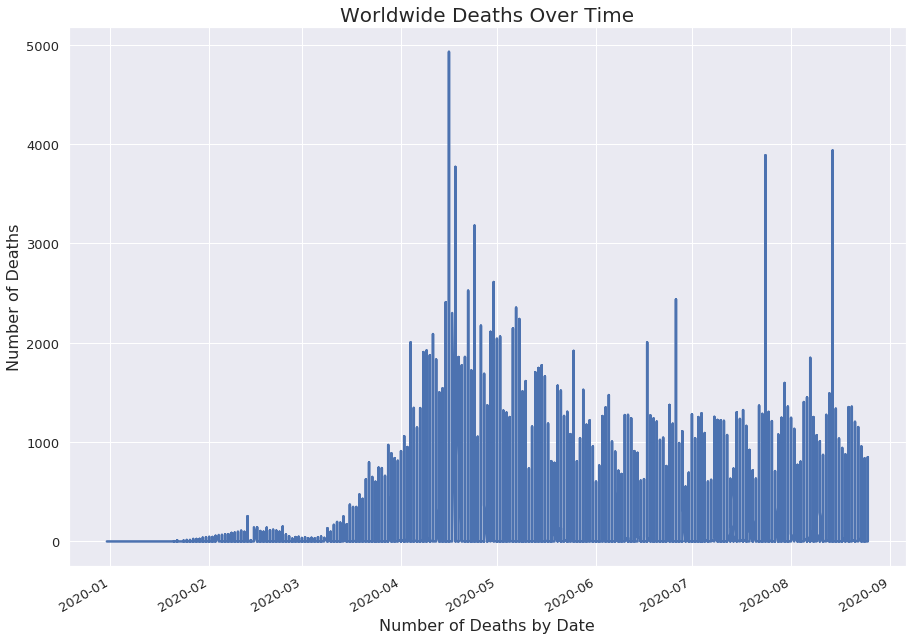

In [15]:
sns.set(rc={'figure.figsize':(15,11)})
world_daily['Deaths'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

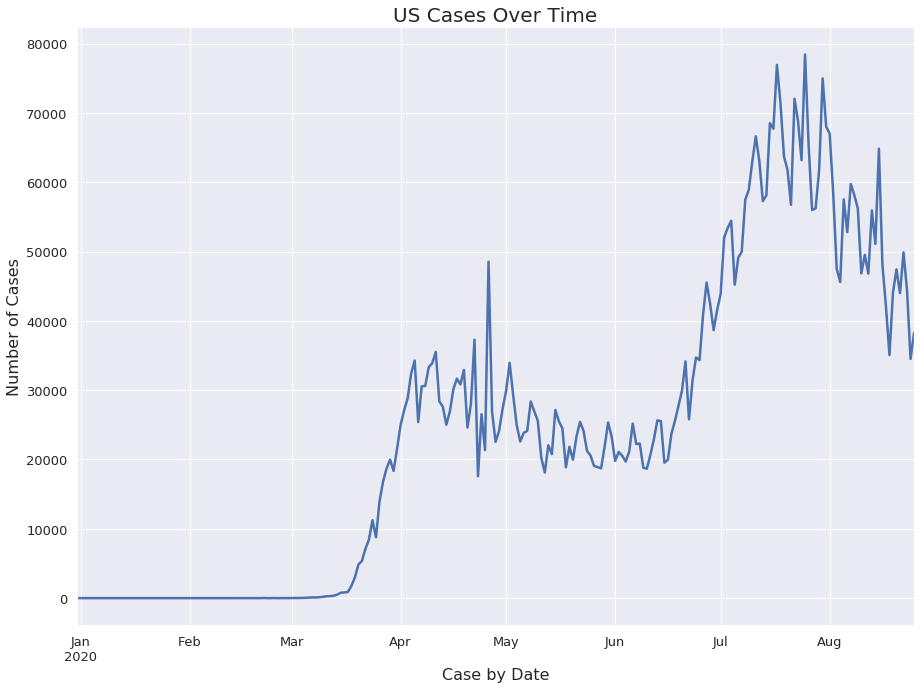

In [16]:
UScovid19_df = covid19_dfA[covid19_dfA["Country"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['Cases'].plot(linewidth = 2.5)

plt.title('US Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

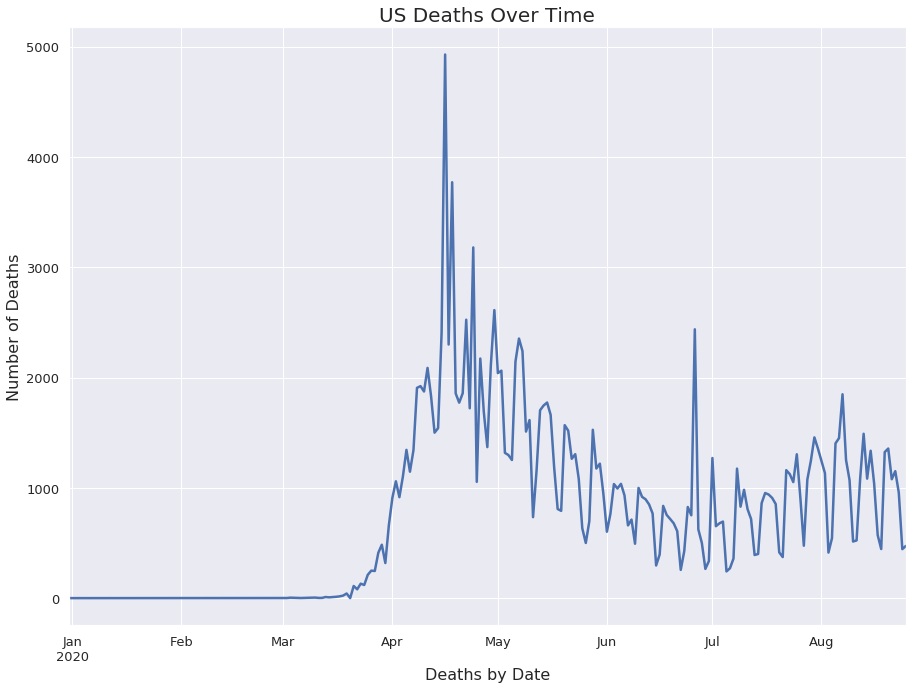

In [17]:
UScovid19_df = covid19_dfA[covid19_dfA["Country"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['Deaths'].plot(linewidth = 2.5)

plt.title('US Deaths Over Time', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()